In [55]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [56]:
def l_matrix(n=100):
    result = np.identity(n)*2
    result[1:,:-1] += -np.identity(n-1)
    result[:-1,1:] += -np.identity(n-1)
    return result

In [57]:
N = 100
the_matrix = l_matrix(N)
the_matrix = the_matrix@the_matrix

In [209]:
def fixed_point_iterations(A, n = 1000, initial_vector = None, ):
    
    if initial_vector is None:
        initial_vector = np.random.rand(A.shape[0])
        
    u = np.copy(initial_vector)
    
    eigenvalues = []
    
    for i in range(n):
        u /= np.linalg.norm(u)
        u = A@u
        
        eigenvalue = np.dot(A@u, u)/np.dot(u,u)
        eigenvalues.append(eigenvalue)
        
    
    
    return eigenvalue, np.asarray(eigenvalues)

# Максимальное собственное число

In [68]:
# we should get:
np.linalg.eigh(the_matrix)[0][-1]

15.992261452603096

In [61]:
fixed_point_iterations(the_matrix, 10**4)[0]

15.992261452603092


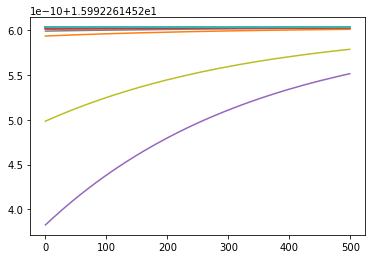

In [54]:
for i in range(50):
    # plot current eigval on each step with different initializations
    plt.plot(fixed_point_iterations(the_matrix, 10**4)[1][-500:])

# Минимальное собственное число

In [207]:
the_matrix_1 = np.linalg.inv(the_matrix)

In [216]:
# we should get:
np.linalg.eigh(the_matrix)[0][0]

9.359312831885286e-07

In [208]:
1/(fixed_point_iterations(the_matrix_1 + np.identity, 10**4)[0])

9.359312841493329e-07

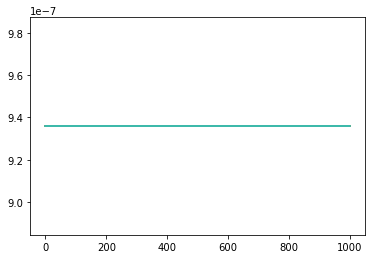

In [218]:
for i in range(50):
    # plot current eigval on each step with different initializations
    plt.plot(1/fixed_point_iterations(the_matrix_1, 10**4)[1][-1000:])